#Building a neural network of image classifier
**(total: 5 points)**
1.  submit ipynb
2.  follow the instructions and fill the blanks in this Jupyter notebook

#Importing the libraries (Do Not Change)

In [ ]:
import numpy as np
np.__version__
# since np doesn't work with TF we have to downgrade it to 1.26.4

'1.26.4'

In [3]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

#Importing the dataset (Do Not Change)

In [4]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 7s 235us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

#Splitting the dataset into the Training set, Validation set and Test set (Do Not Change)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

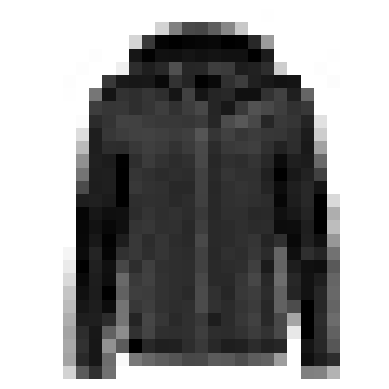

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

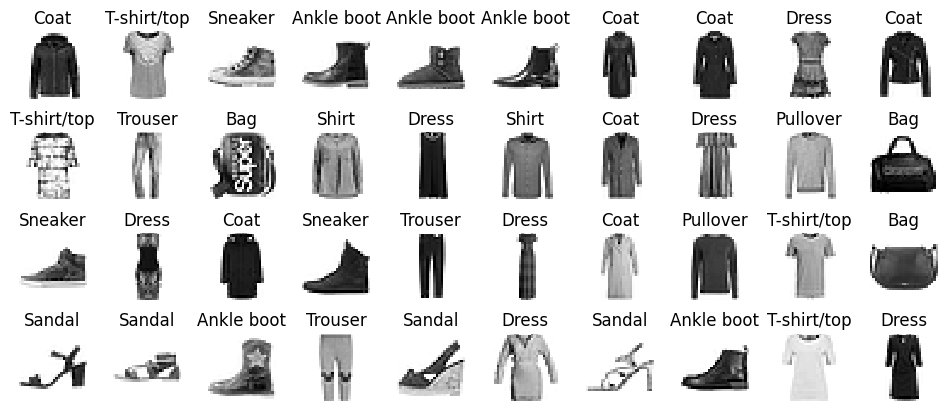

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#Build a Neural Network model: (1 point)

1.   need to design two hidden layers
2.   the first hidden layer has 300 neurons, activation function is ReLU
3.   the second hidden layer has 100 neurons, activation function is ReLU

In [15]:
#your code
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


c:\Users\Strix\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model: (1 point)
1.   specify the loss function: sparse_categorical_crossentropy
2.   specify the optimizer: adam

In [17]:
#your code
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

#Training neural network model: (1 point)


1.   specify the batch size as 100
2.   specify the epochs as 20
3.   include a validation set


In [18]:
#your code
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data = (X_valid, y_valid)
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7838 - loss: 0.6139 - val_accuracy: 0.8662 - val_loss: 0.3852
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8612 - loss: 0.3749 - val_accuracy: 0.8758 - val_loss: 0.3593
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8766 - loss: 0.3317 - val_accuracy: 0.8700 - val_loss: 0.3487
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8845 - loss: 0.3101 - val_accuracy: 0.8816 - val_loss: 0.3288
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8922 - loss: 0.2872 - val_accuracy: 0.8860 - val_loss: 0.3202
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8983 - loss: 0.2711 - val_accuracy: 0.8888 - val_loss: 0.3048
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9070 - loss: 0.2514 - val_accuracy: 0.8972 - val_loss: 0.2930
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9090 - loss: 0.2467 -

#Evaluation (1 point)

1.   print the total loss on testing set
2.   print the accuracy of testing set

In [19]:
#your code
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8812 - loss: 0.3306
Test accuracy: 0.88


#Predicting the first three images from the test set (1 point)


1.   print the predicted results of the first three images from the test set
2.   print the real label of the first three images from the test set



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


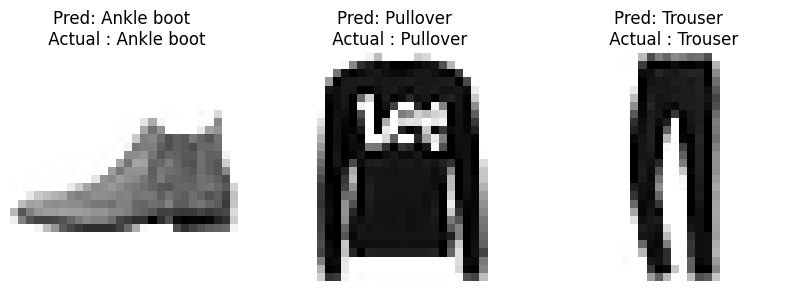

In [23]:
#your code

X_three_test = X_test[:3]

y_pred = model.predict(X_three_test)

predicted_classes = np.argmax(y_pred, axis = 1)

plt.figure(figsize=(10,3))
for index, image in enumerate(X_three_test):
    plt.subplot(1,3, index+1)
    plt.imshow(image, cmap = "binary")
    plt.axis('off')
    plt.title(f"Pred: {class_names[predicted_classes[index]]} \n Actual : {class_names[y_test[index]]}")

plt.show()